In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [2]:
datatrain=pd.read_csv('datatraining.txt')
datatest1=pd.read_csv('datatest.txt')
datatest2=pd.read_csv('datatest2.txt')

In [3]:
datatrain.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [4]:
datatrain.tail()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
8139,2015-02-10 09:29:00,21.05,36.0975,433.0,787.250000,0.005579,1
8140,2015-02-10 09:29:59,21.05,35.9950,433.0,789.500000,0.005563,1
8141,2015-02-10 09:30:59,21.10,36.0950,433.0,798.500000,0.005596,1
8142,2015-02-10 09:32:00,21.10,36.2600,433.0,820.333333,0.005621,1
8143,2015-02-10 09:33:00,21.10,36.2000,447.0,821.000000,0.005612,1


In [5]:
datatrain.shape

(8143, 7)

In [6]:
datatrain.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000
mean,20.619084,25.731507,119.519375,606.546243,0.003863,0.212330
std,1.016916,5.531211,194.755805,314.320877,0.000852,0.408982
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,19.700000,20.200000,0.000000,439.000000,0.003078,0.000000
50%,20.390000,26.222500,0.000000,453.500000,0.003801,0.000000
75%,21.390000,30.533333,256.375000,638.833333,0.004352,0.000000
max,23.180000,39.117500,1546.333333,2028.500000,0.006476,1.000000


In [7]:
datatrain.isnull().sum()

date             0
Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64

In [8]:
datatrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8143 entries, 1 to 8143
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           8143 non-null   object 
 1   Temperature    8143 non-null   float64
 2   Humidity       8143 non-null   float64
 3   Light          8143 non-null   float64
 4   CO2            8143 non-null   float64
 5   HumidityRatio  8143 non-null   float64
 6   Occupancy      8143 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 508.9+ KB


In [9]:
datatrain[["Year","Month","Day"]]=datatrain["date"].str.split("-",expand=True)

In [10]:
datatrain.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,Year,Month,Day
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1,2015,02,04 17:51:00
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1,2015,02,04 17:51:59
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1,2015,02,04 17:53:00
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1,2015,02,04 17:54:00
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1,2015,02,04 17:55:00


In [11]:
datatrain=datatrain.drop("date",axis=1)

In [12]:
datatrain.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,Year,Month,Day
1,23.18,27.2720,426.0,721.25,0.004793,1,2015,02,04 17:51:00
2,23.15,27.2675,429.5,714.00,0.004783,1,2015,02,04 17:51:59
3,23.15,27.2450,426.0,713.50,0.004779,1,2015,02,04 17:53:00
4,23.15,27.2000,426.0,708.25,0.004772,1,2015,02,04 17:54:00
5,23.10,27.2000,426.0,704.50,0.004757,1,2015,02,04 17:55:00


In [13]:
datatrain.corr().Occupancy.sort_values(ascending=False)

C:\Users\Anjali Srivastava\AppData\Local\Temp\ipykernel_24904\2671749555.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  datatrain.corr().Occupancy.sort_values(ascending=False)


Occupancy        1.000000
Light            0.907352
CO2              0.712235
Temperature      0.538220
HumidityRatio    0.300282
Humidity         0.132964
Name: Occupancy, dtype: float64

<Axes: >

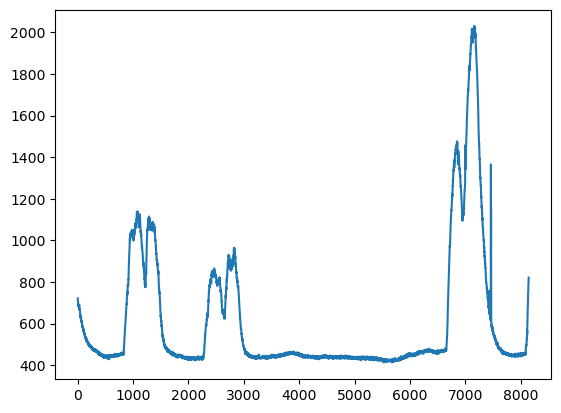

In [14]:
datatrain.CO2.plot()

<Axes: >

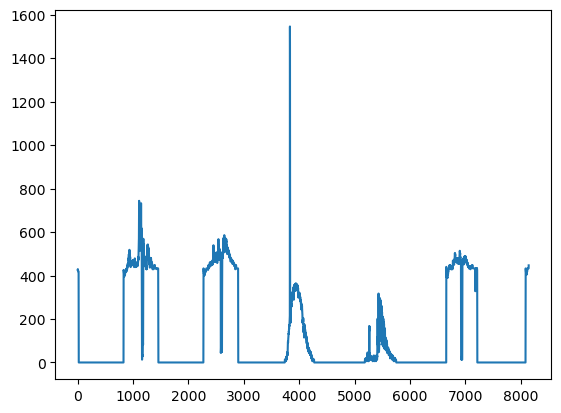

In [15]:
datatrain.Light.plot()


<Axes: >

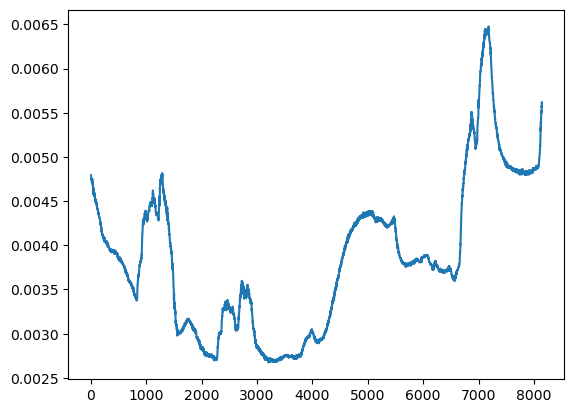

In [16]:
datatrain.HumidityRatio.plot()

<Axes: >

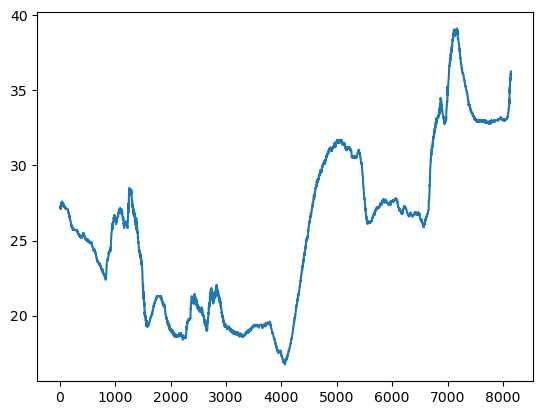

In [17]:
datatrain.Humidity.plot()

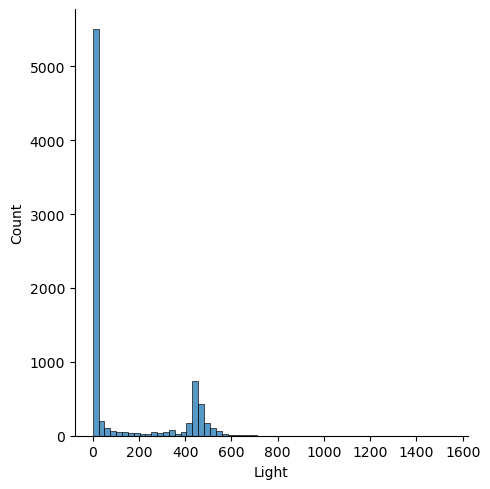

In [18]:
# plt.figure(figsize=(16,4))
sns.displot(datatrain["Light"])

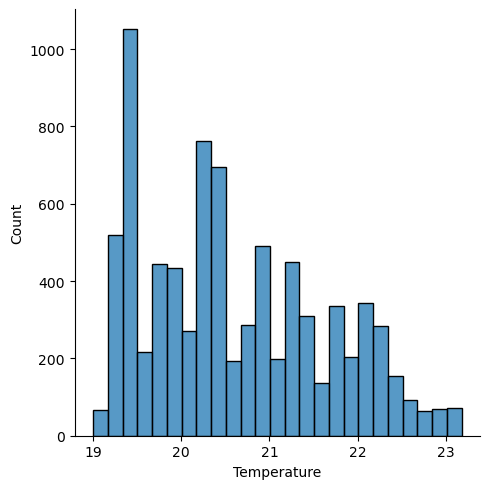

In [19]:
sns.displot(datatrain["Temperature"])

## X and Y split here =>(dependent and independent)

In [20]:
Y=datatrain["Occupancy"]
X=datatrain.drop("Occupancy",axis=1)

In [21]:
Y.head()

1    1
2    1
3    1
4    1
5    1
Name: Occupancy, dtype: int64

In [22]:
X.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Year,Month,Day
1,23.18,27.2720,426.0,721.25,0.004793,2015,02,04 17:51:00
2,23.15,27.2675,429.5,714.00,0.004783,2015,02,04 17:51:59
3,23.15,27.2450,426.0,713.50,0.004779,2015,02,04 17:53:00
4,23.15,27.2000,426.0,708.25,0.004772,2015,02,04 17:54:00
5,23.10,27.2000,426.0,704.50,0.004757,2015,02,04 17:55:00


{'whiskers': [<matplotlib.lines.Line2D at 0x248af8d6f90>,
 'caps': [<matplotlib.lines.Line2D at 0x248b10639d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x248af93e750>],
 'medians': [<matplotlib.lines.Line2D at 0x248b1079050>],
 'fliers': [<matplotlib.lines.Line2D at 0x248b1078510>],
 'means': []}

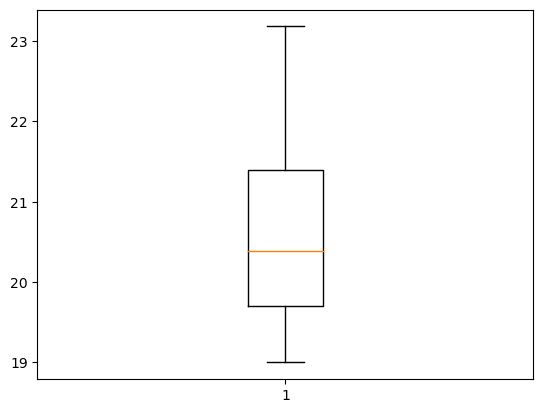

In [23]:
plt.boxplot(datatrain["Temperature"])

{'whiskers': [<matplotlib.lines.Line2D at 0x248b10c3a50>,
 'caps': [<matplotlib.lines.Line2D at 0x248b10cd190>,
 'boxes': [<matplotlib.lines.Line2D at 0x248b10c2fd0>],
 'medians': [<matplotlib.lines.Line2D at 0x248b10ce7d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x248b10cced0>],
 'means': []}

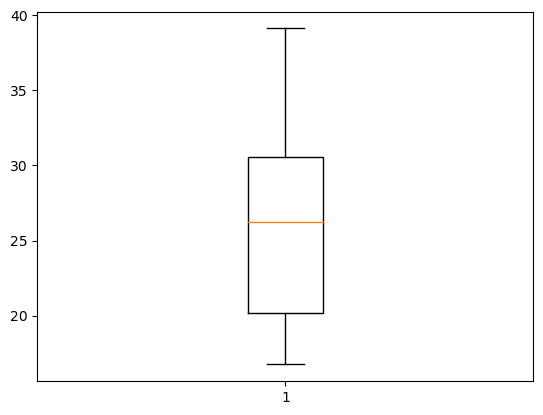

In [24]:
plt.boxplot(datatrain["Humidity"])

<Axes: xlabel='CO2', ylabel='Count'>

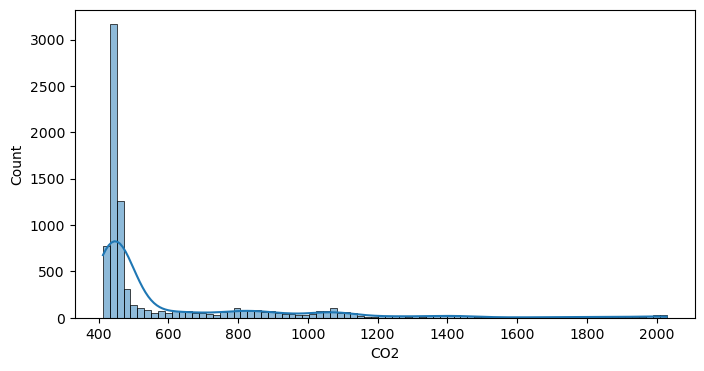

In [25]:
plt.figure(figsize=(8, 4))
sns.histplot(data=datatrain,x="CO2",kde=True)

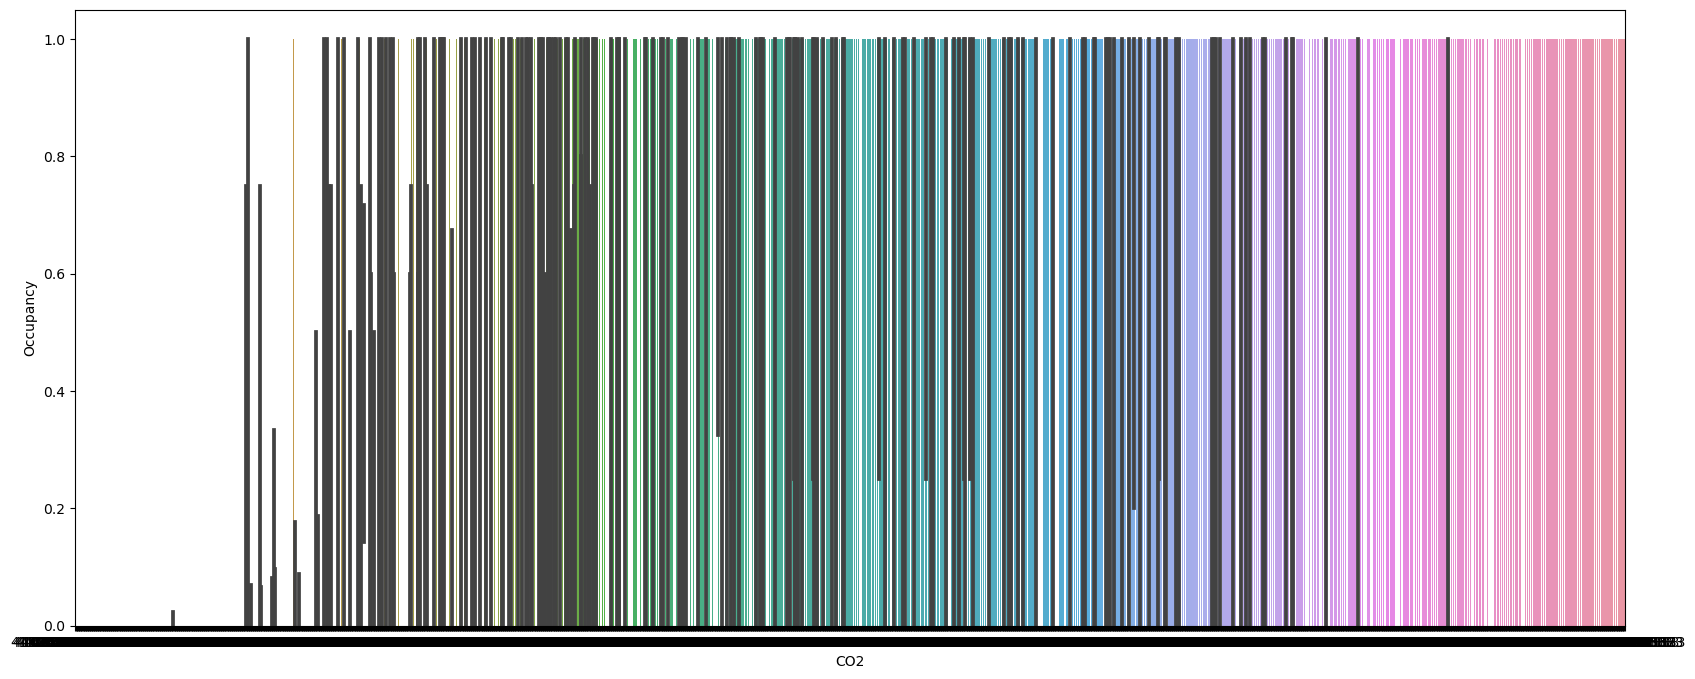

In [26]:
plt.figure(figsize=(20, 8))
sns.barplot(x=X["CO2"],y=Y)
plt.show()

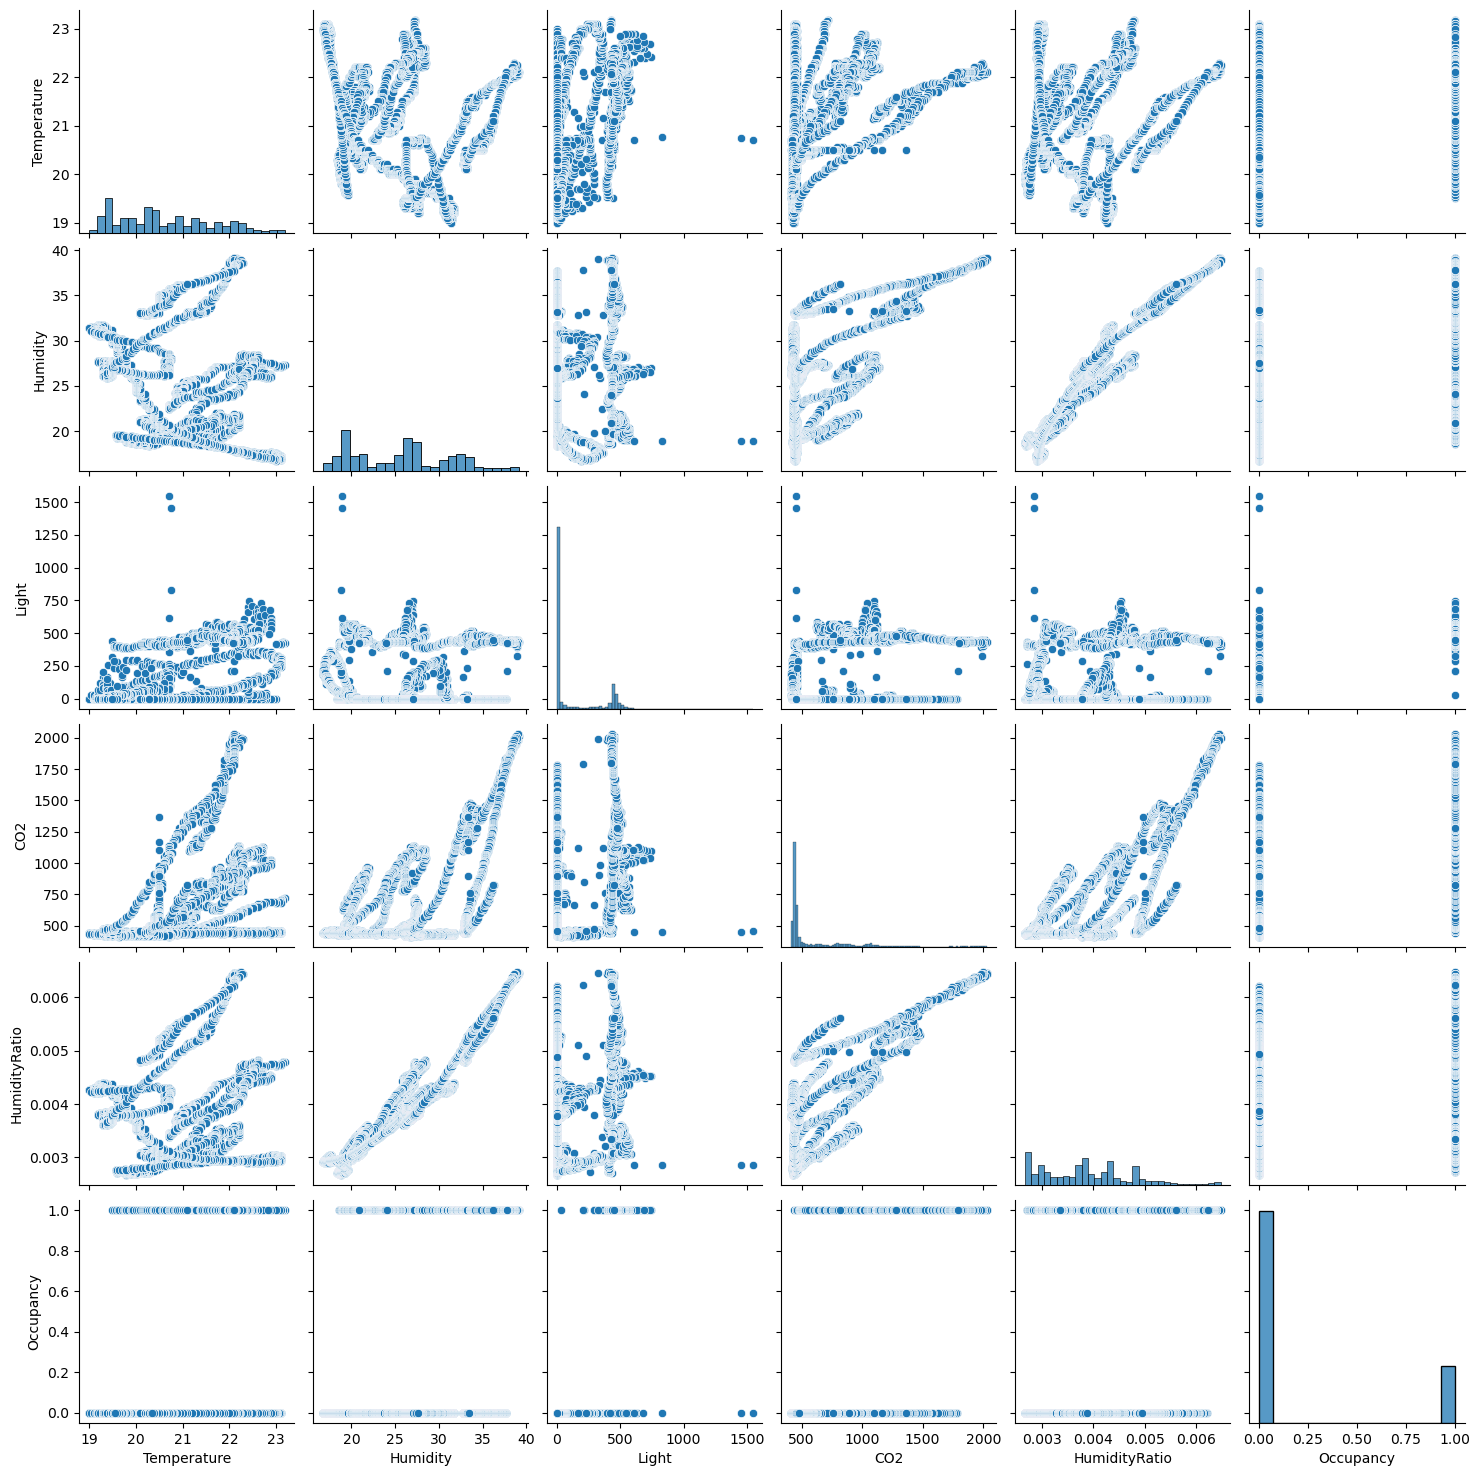

In [27]:
sns.pairplot(datatrain)

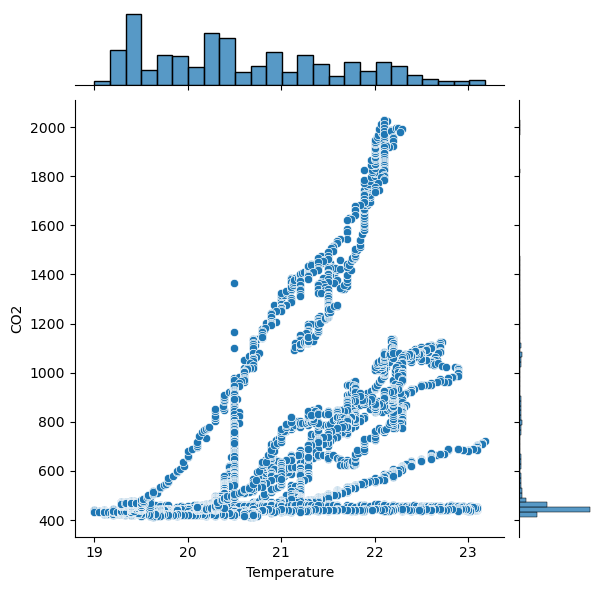

In [28]:
sns.jointplot(data=datatrain, x='Temperature', y='CO2', kind='scatter')
plt.show()

C:\Users\Anjali Srivastava\AppData\Local\Temp\ipykernel_24904\1571223003.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(datatrain.corr(),annot=True)


Text(0.5, 1.0, 'Correlation Heatmap')

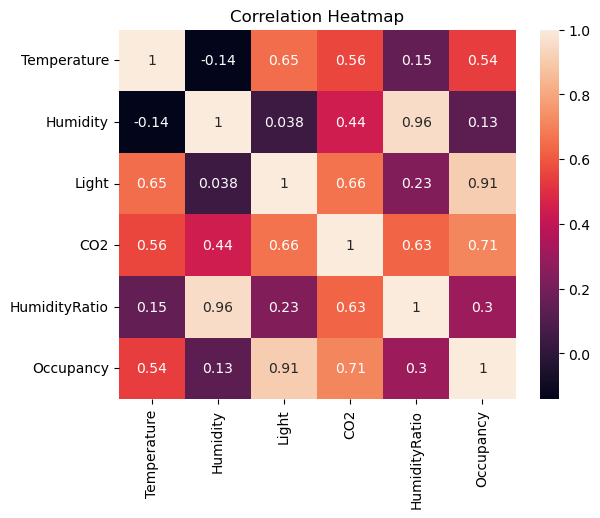

In [29]:
sns.heatmap(datatrain.corr(),annot=True)
plt.title("Correlation Heatmap")

In [30]:
le1=LabelEncoder()
le2=LabelEncoder()
le3=LabelEncoder()

In [31]:
X["Year"]=le1.fit_transform(datatrain.Year)
X["Month"]=le2.fit_transform(datatrain.Month)
X["Day"]=le3.fit_transform(datatrain.Day)

In [32]:
X.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Year,Month,Day
1,23.18,27.2720,426.0,721.25,0.004793,0,0,0
2,23.15,27.2675,429.5,714.00,0.004783,0,0,1
3,23.15,27.2450,426.0,713.50,0.004779,0,0,2
4,23.15,27.2000,426.0,708.25,0.004772,0,0,3
5,23.10,27.2000,426.0,704.50,0.004757,0,0,4


In [33]:
X.shape

(8143, 8)

In [34]:
Y.shape

(8143,)

In [35]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [36]:
X_train.shape

(6514, 8)

In [37]:
X_test.shape

(1629, 8)

In [38]:
Y_train.shape

(6514,)

In [39]:
sc=StandardScaler()

In [40]:
X_train=sc.fit_transform(X_train)

In [41]:
X_test=sc.transform(X_test)

In [42]:
from sklearn.tree import DecisionTreeClassifier
DC=DecisionTreeClassifier(random_state=0)
DC.fit(X_train,Y_train)

DecisionTreeClassifier(random_state=0)

In [43]:
X_test_predict=DC.predict(X_test)

In [44]:
X_test_predict

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [45]:
from sklearn.metrics import accuracy_score

In [46]:
acc=accuracy_score(Y_test,X_test_predict)

In [47]:
acc

0.9914057704112953

In [48]:
cm=confusion_matrix(Y_test,X_test_predict)

In [49]:
cm   #FN   #FP
     #TN   #TP

array([[1255,    9],
       [   5,  360]], dtype=int64)

In [50]:
import sklearn.metrics as mat

In [51]:
fpr,tpr,threshold = mat.roc_curve(Y_test,X_test_predict)

In [52]:
roc_auc=mat.auc(fpr,tpr)

In [53]:
fpr

array([0.        , 0.00712025, 1.        ])

In [54]:
tpr

array([0.        , 0.98630137, 1.        ])

In [55]:
threshold

array([inf,  1.,  0.])

In [56]:
roc_auc

0.9895905583492283

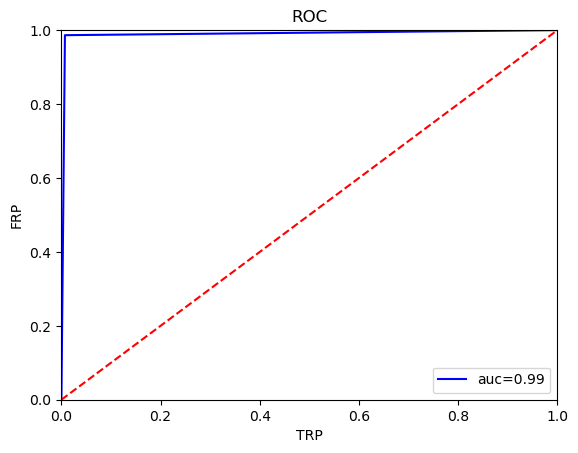

In [58]:
plt.title('ROC')
plt.plot(fpr,tpr,"b",label="auc=%0.2f"%roc_auc)
plt.legend(loc="lower right")
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('TRP')
plt.ylabel('FRP')
plt.show()

## PREDICTIVE SYSTEM

In [70]:
y1=DC.predict([[23.18,27.2720,426.0,721.25,0.004793,0,0,0]])

In [75]:
y1
if(y1==1):
    print("OCCUPANCY THERE")
else:
    print("OCCUPANCY NOT THERE")

OCCUPANCY THERE


In [76]:
y2=DC.predict([[21.50,26.1000,0.000,500.00,0.004137,0,0,200]])
y2
if(y2==1):
    print("OCCUPANCY THERE")
else:
    print("OCCUPANCY NOT THERE")

OCCUPANCY NOT THERE


In [77]:
import pickle

In [78]:
pickle.dump(DC,open('occupancy.pkl','wb'))

In [68]:
datatrain.iloc[200]

Temperature             21.5
Humidity                26.1
Light                    0.0
CO2                    500.0
HumidityRatio       0.004137
Occupancy                  0
Year                    2015
Month                     02
Day              04 21:10:59
Name: 201, dtype: object

In [69]:
X.iloc[200,:]

Temperature       21.500000
Humidity          26.100000
Light              0.000000
CO2              500.000000
HumidityRatio      0.004137
Year               0.000000
Month              0.000000
Day              200.000000
Name: 201, dtype: float64